<a href="https://colab.research.google.com/github/ancestor9/24_fall_textmining_NLP/blob/main/1105_%EC%A4%91%EA%B0%84%EA%B3%A0%EC%82%AC_01_%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **<font color='orange'> Phase 1. 데이터수집 단계**
### **1. 엑셀 시트를 읽고 파케이(parquet)형태로 저장하기**

#### **1.1. 20개 시트를 parquet로 나누어 저장하기**

In [ ]:
# prompt: data라는 폴더를 만들자

import os

# Create the directory if it doesn't exist
if not os.path.exists('data'):
    os.makedirs('data')
    print("Directory 'data' created successfully.")
else:
    print("Directory 'data' already exists.")


Directory 'data' already exists.


In [ ]:
excel_file_path = '/content/drive/MyDrive/2024_2학기/인공지능모델운영/24_가을_인공지능모델운영_textmining/data/Capstone_03_SentimentAnalysis.xlsx'

In [ ]:
dfs = pd.read_excel(excel_file_path, sheet_name=None)

In [ ]:
for k,v in dfs.items():
    print(k)
    print(v.head(2))
    print('*'*100)

Sheet_1
         뉴스 식별자        일자   언론사  기고자  \
0  1.100901e+06  20241004  중앙일보  NaN   
1  2.100851e+06  20240802  아주경제  정연우   

                                         제목     통합 분류1      통합 분류2   통합 분류3  \
0    [2024 소비자만족 브랜드 대상 1위] 차별화된 홍보 마케팅 서비스  IT_과학>콘텐츠   IT_과학>모바일   경제>자동차   
1  [인터뷰] 김태년 "中, 최대 무역 흑자국 민감한 문제 의회외교로 해결"      정치>외교      정치>청와대      NaN   

  사건/사고 분류1 사건/사고 분류2 사건/사고 분류3                       인물  \
0       NaN       NaN       NaN                      NaN   
1       NaN       NaN       NaN  김,문재인,시진핑,리창,윤석열,김태년,방중   

                                              위치  \
0                                            NaN   
1  국가주석,미국,대중국,서울,중국,한국,中,우호,싱크탱크,중,중한우호소조,미,尹,한   

                                                  기관  \
0                                   유튜브,캡슐미디어,㈜캡슐미디어   
1  한중의원연맹회장,중국 외교부,동북아,한중의원연맹,한국,전인대,한·중·일 정상회의,민...   

                                                 키워드  \
0  1위,소비자,만족,브랜드,대상,차별화,홍보,마케팅,서비스,캡슐미디어,캡슐미디어,1위...   
1  김태년,흑자국,최대,

In [ ]:
# prompt: excel_file_path의 엑셀 파일은 여러 개 시트로 구성되어 있는데 이 시트를 모두 읽어야 한다

import os
import pandas as pd

# ### **<font color='orange'> Phase 1. 데이터수집 단계**
# ### **1. 엑셀 시트를 읽고 파케이(parquet)형태로 저장하기**
#
# #### **1.1. 20개 시트를 parquet로 나누어 저장하기**


# Create the directory if it doesn't exist
if not os.path.exists('data'):
    os.makedirs('data')
    print("Directory 'data' created successfully.")
else:
    print("Directory 'data' already exists.")

excel_file_path = '/content/drive/MyDrive/2024_2학기/인공지능모델운영/24_가을_인공지능모델운영_textmining/data/Capstone_03_SentimentAnalysis.xlsx'

# Read all sheets from the Excel file
xls = pd.ExcelFile(excel_file_path)
for sheet_name in xls.sheet_names:
    # Read each sheet into a pandas DataFrame
    df = pd.read_excel(excel_file_path, sheet_name=sheet_name)

    # Save each sheet as a parquet file
    parquet_file_path = os.path.join('data', f'{sheet_name}.parquet')
    df.to_parquet(parquet_file_path)
    print(f"Sheet '{sheet_name}' saved as '{parquet_file_path}'")

Directory 'data' already exists.
Sheet 'Sheet_1' saved as 'data/Sheet_1.parquet'
Sheet 'Sheet_2' saved as 'data/Sheet_2.parquet'
Sheet 'Sheet_3' saved as 'data/Sheet_3.parquet'
Sheet 'Sheet_4' saved as 'data/Sheet_4.parquet'
Sheet 'Sheet_5' saved as 'data/Sheet_5.parquet'
Sheet 'Sheet_6' saved as 'data/Sheet_6.parquet'
Sheet 'Sheet_7' saved as 'data/Sheet_7.parquet'
Sheet 'Sheet_8' saved as 'data/Sheet_8.parquet'
Sheet 'Sheet_9' saved as 'data/Sheet_9.parquet'
Sheet 'Sheet_10' saved as 'data/Sheet_10.parquet'
Sheet 'Sheet_11' saved as 'data/Sheet_11.parquet'
Sheet 'Sheet_12' saved as 'data/Sheet_12.parquet'
Sheet 'Sheet_13' saved as 'data/Sheet_13.parquet'
Sheet 'Sheet_14' saved as 'data/Sheet_14.parquet'
Sheet 'Sheet_15' saved as 'data/Sheet_15.parquet'
Sheet 'Sheet_16' saved as 'data/Sheet_16.parquet'
Sheet 'Sheet_17' saved as 'data/Sheet_17.parquet'
Sheet 'Sheet_18' saved as 'data/Sheet_18.parquet'
Sheet 'Sheet_19' saved as 'data/Sheet_19.parquet'
Sheet 'Sheet_20' saved as 'data/She

In [ ]:
/content/drive/MyDrive/2024_2학기/인공지능모델운영/24_가을_인공지능모델운영_textmining/data/Capstone_03_SentimentAnalysis.pkl

In [ ]:
# prompt: excel_file_path의 엑셀 파일은 여러개 시트로 구성되어 있는데 이 시트를 모두 읽어야 한다

import pandas as pd
import pyarrow

# Install pyarrow if not already installed
try:
    import pyarrow
except ImportError:
    !pip install pyarrow

# Read the Excel file into a pandas DataFrame, reading all sheets
excel_file_path = '/content/drive/MyDrive/2024_2학기/인공지능모델운영/24_가을_인공지능모델운영_textmining/data/Capstone_03_SentimentAnalysis.xlsx'
dfs = pd.read_excel(excel_file_path, sheet_name=None) # sheet_name=None reads all sheets

# Process each sheet
for sheet_name, df in dfs.items():
    parquet_file_path = f'/content/data/{sheet_name}.parquet'  # Create a separate parquet file for each sheet
    df.to_parquet(parquet_file_path)
    print(f"Successfully converted sheet '{sheet_name}' to parquet format and saved as '{parquet_file_path}'")

Successfully converted sheet 'Sheet_1' to parquet format and saved as '/content/data/Sheet_1.parquet'
Successfully converted sheet 'Sheet_2' to parquet format and saved as '/content/data/Sheet_2.parquet'
Successfully converted sheet 'Sheet_3' to parquet format and saved as '/content/data/Sheet_3.parquet'
Successfully converted sheet 'Sheet_4' to parquet format and saved as '/content/data/Sheet_4.parquet'
Successfully converted sheet 'Sheet_5' to parquet format and saved as '/content/data/Sheet_5.parquet'
Successfully converted sheet 'Sheet_6' to parquet format and saved as '/content/data/Sheet_6.parquet'
Successfully converted sheet 'Sheet_7' to parquet format and saved as '/content/data/Sheet_7.parquet'
Successfully converted sheet 'Sheet_8' to parquet format and saved as '/content/data/Sheet_8.parquet'
Successfully converted sheet 'Sheet_9' to parquet format and saved as '/content/data/Sheet_9.parquet'
Successfully converted sheet 'Sheet_10' to parquet format and saved as '/content/d

In [ ]:
# prompt: 모든 parquet 파일을 읽어 하나의 파일로 만들어줘
import glob
import os

# Get a list of all parquet files in the current directory
parquet_files = glob.glob('./data/*.parquet')

# Create an empty list to store dataframes
dfs = []

# Iterate through each parquet file
for file in parquet_files:
    # Read the parquet file into a pandas DataFrame
    df = pd.read_parquet(file)
    # Append the dataframe to the list
    dfs.append(df)

print(f'The numer of dataframes: {len(dfs)}')

# Concatenate all dataframes into a single dataframe
combined_df = pd.concat(dfs, ignore_index=True)

# Specify the output path for the combined parquet file
output_file = './combined.parquet'

# Save the combined dataframe to a single parquet file
combined_df.to_parquet(output_file)

print(f"Successfully combined all parquet files into '{output_file}'")

The numer of dataframes: 20
Successfully combined all parquet files into './combined.parquet'


In [ ]:
excel_file_path

'/content/drive/MyDrive/2024_2학기/인공지능모델운영/24_가을_인공지능모델운영_textmining/data/Capstone_03_SentimentAnalysis.xlsx'

In [ ]:
df = pd.read_pickle('/content/drive/MyDrive/2024_2학기/인공지능모델운영/24_가을_인공지능모델운영_textmining/data/Capstone_03_SentimentAnalysis.pkl')

In [ ]:
df.shape

(17807, 10)

In [ ]:
combined_df.shape

(37330, 19)

In [ ]:
combined_df.shape

(37330, 19)

In [ ]:
combined_df.head(2)

,뉴스 식별자,일자,언론사,기고자,제목,통합 분류1,통합 분류2,통합 분류3,사건/사고 분류1,사건/사고 분류2,사건/사고 분류3,인물,위치,기관,키워드,특성추출(가중치순 상위 50개),본문,URL,분석제외 여부
0,4.101008e+06,20240828,이데일리,김정유,"홈플러스, ‘AI 가격혁명’ 강화 품목 2배 확대",경제>서비스_쇼핑,경제>유통,경제>부동산,None,None,None,김상진,"하인즈,LA,유명산,대구,비엔나,유명","홈플러스,CJ,신선식품,1.4kg,15Brix,10kg,샤인,1kg","홈플러스,AI,가격,혁명,강화,품목,확대,홈플러스,29일,2배,인공지능,AI,가격혁...","홈플러스,다음달,ai,2배,2490원,800g,한돈,쟁반짜장,500g,3990원,1...",[이데일리 김정유 기자] 홈플러스는 29일부터 다음달 11일까지 ‘2배 더 강력해진...,http://www.edaily.co.kr/news/newspath.asp?news...,None
1,1.100201e+06,20241011,국민일보,김동환,‘흑백요리사’가 왜 여기서 나와? 한강 노벨상 인터뷰 포착,문화>방송_연예,문화>출판,문화>전시_공연,None,None,None,"임,임태훈,임 셰프","종로구,한강,서울,서촌,누상동","노벨상,노벨위원회,유튜브,국민일보,넷플릭스,JTBC","흑백요리사,한강,노벨상,인터뷰,포착,흑백요리사,넷플릭스,예능,흑백,요리사,요리사,일...","셰프,한강,요리사,흑백요리사,철가방,서울,서촌,종로구,노벨문학상,노벨상,출연자,유튜...",넷플릭스 예능 ‘흑백요리사’에서 일명 ‘철가방 요리사’로 인기를 얻은 임태훈(39)...,https://www.kmib.co.kr/article/view.asp?arcid=...,None


In [ ]:
sel_col = ['일자', '언론사', '기고자', '제목', '통합 분류1', '인물', '위치', '기관', '본문',]

In [ ]:
df = combined_df[sel_col]
df

,일자,언론사,기고자,제목,통합 분류1,인물,위치,기관,본문
0,20240828,이데일리,김정유,"홈플러스, ‘AI 가격혁명’ 강화 품목 2배 확대",경제>서비스_쇼핑,김상진,"하인즈,LA,유명산,대구,비엔나,유명","홈플러스,CJ,신선식품,1.4kg,15Brix,10kg,샤인,1kg",[이데일리 김정유 기자] 홈플러스는 29일부터 다음달 11일까지 ‘2배 더 강력해진...
1,20241011,국민일보,김동환,‘흑백요리사’가 왜 여기서 나와? 한강 노벨상 인터뷰 포착,문화>방송_연예,"임,임태훈,임 셰프","종로구,한강,서울,서촌,누상동","노벨상,노벨위원회,유튜브,국민일보,넷플릭스,JTBC",넷플릭스 예능 ‘흑백요리사’에서 일명 ‘철가방 요리사’로 인기를 얻은 임태훈(39)...
2,20240903,한국경제,심은지,'한강변 최고 77층' 아파트촌 탈바꿈 성수4지구 '들썩',지역>경남,정영보,"성수4구역,한강,서울,성수4지구,성수전략정비구역,성수전략정비구,서울시,성동구,성수","집행,시공사,성수1·2·4지구,성동구청,성수4지구,성수전략정비구역",한강 변 초고층 주거지로 변모하는 서울 성동구 성수전략정비구역이 연말 도시정비사업 ...
3,20241010,경향신문,None,[사설] 한강의 노벨문학상 수상 한국 문학의 기념비적 쾌거,문화>출판,"김대중,한승원","우크라이나,스웨덴,한강,광주항쟁,영광,한국,트라,광주,용산","노벨상,한강,현대,한림원,혁신가,한국,희생자",소설가 한강이 한국 작가 최초로 노벨문학상을 수상했다. 스웨덴 한림원은 10일 올해...
4,20240822,강원도민일보,남궁창성,[명경대] 1945년 건국(建國) 운동,정치>북한,"황운,여운형,진영,엔도오","경운동,몽양,서울,상록수,일제,건국동","조동우,조선총독부,동원,삼광의원,삼각산,몽양,일본,건국준비위원회,아침,통일,건국동맹",1944년 8월10일 서울 경운동 삼광의원. 머리가 희끗희끗한 몽양 여운형(1886...
...,...,...,...,...,...,...,...,...,...
37325,20240906,전자신문,안수민,"천안시, 파워오토로보틱스 등 미래 유니콘기업 'C-STAR 2기' 6개사 선정",경제>반도체,"이동헌,황장선,이종원,이태영,권영관","숙성,서북(대표,영국,천안,발주,천안시,서북","티엔에스솔루션,랩투보틀,천안시,C-STAR,중기부,티엔에스,천안시장,IWSC",천안시는 미래 유니콘기업 'C-STAR 2기'를 모집한 결과 6개 사를 최종 선정했...
37326,20241001,뉴스핌,김승현 기자,"한국타이어, '사업주 직업능력개발훈련 우수사례 경진대회' 수상",사회>교육_시험,이수일,"킨텍스,니즈,고양시,한국,경기도","한국타이어,HRD협회,한국앤컴퍼니그룹,세미나,한국산업인력공단,고용노동부,자원,대전지...",[서울=뉴스핌] 김승현 기자 = 한국앤컴퍼니그룹의 글로벌 선도 타이어 기업 한국타이...
37327,20240814,아시아경제,황서율,"LGU+, AI 빅데이터로 화순군청 스마트시티 전환 돕는다",지역>충남,"구복규,김민수,박해성","티브릿지대표이사,화순군,허남경,천안시,화순군청","LGU+,MOU,티브릿지코퍼레이션,화순군청,LG유플러스,나이스지니데이타",LG유플러스는 데이터 전문 기업들과 함께 인공지능(AI) 빅데이터 등 기술을 활용해...
37328,20240828,대전일보,신익규 기자,"코레일, 철도 운영에 IT 녹인 '디지털 허브' 개소",지역>대전,한문희,"라운지,대전","대전사,한국철도공사,코레일",한국철도공사는 28일 대전사옥에 철도 산업의 디지털 전환을 선도할 '디지털 허브'를...


- 중복기사 삭제 (no duplication)

In [ ]:
df[df.duplicated(subset=['제목'])]

,일자,언론사,기고자,제목,통합 분류1,인물,위치,기관,본문
180,20240828,헤럴드경제,정석준 기자,"코카콜라, 여주 ‘숲 가꾸기’ 프로젝트 성과 공유",지역>경기,None,"구남주,경기,여의도,용수,여주,여주시","한국수자원공사,수자원,코카콜라,한국생태환경연구소",[헤럴드경제=정석준 기자] 코카콜라가 ‘세계 물 주간’을 맞아 지난 27일 경기 여...
229,20240814,헤럴드경제,김병규 기자,"""대형 북변공원 품은 숲세권 아파트"" ‘한강 수자인 오브센트’ 도심 속 쾌적함 누려",경제>부동산,None,"광교호수공원,북변동,서울,풍무동,인천2호선,경기도,일산호수공원,광교중흥S클래스,호수...","삼성물산,걸포북변역,북변3구역,광교호수공원,스카이라운지,서울로,성남시,한양,한국기업...",-약 3.5만㎡(약 1만여평)의 북변공원 품은 숲세권 아파트로 조성돼 정주여건 뛰어...
303,20240722,전자신문,박효주,"국토부, 하계 휴가철 '특별교통대책' 시행 日 596만명 이동 예상",지역>강원,"이동하,엄정희","서해,안성,주실,양재,남원주,오산,일평,중부,평시,남이,신갈JC","특별교통대책,교통안전,한국교통연구원,국토부,국토교통부,한국도로공사,경부선,교통대",국토교통부는 하계 휴가철 교통 정체를 대비해 오는 25일부터 다음 달 11일까지 1...
408,20240827,쿠키뉴스,이소연,"CJ올리브네트웍스, AWS 클라우드 보안 인증 획득",IT_과학>인터넷_SNS,이주영,None,"CJ올리브네트웍스,MS,SI",CJ올리브네트웍스가 아마존웹서비스(AWS)의 보안 역량 인증을 획득했다. \n \...
415,20240905,아시아투데이,None,"경기도 ""세계 최대 ‘반도체 메가 클러스터’, 물 부족 위험 극복해야""",지역>경기,조영무,"충주댐,남서,한강,팔당댐,경기,횡성,경기도,용인시,경기북,화천,이동저수지,서울특별시...","충주댐,정부,이동저수지,수자원,아시아투데이,경기연구원,북한,용인시,경기도",아시아투데이 김주홍 기자 = 경기 용인시 일대에서 추진되고 있는 세계 최대 '반도체...
...,...,...,...,...,...,...,...,...,...
37325,20240906,전자신문,안수민,"천안시, 파워오토로보틱스 등 미래 유니콘기업 'C-STAR 2기' 6개사 선정",경제>반도체,"이동헌,황장선,이종원,이태영,권영관","숙성,서북(대표,영국,천안,발주,천안시,서북","티엔에스솔루션,랩투보틀,천안시,C-STAR,중기부,티엔에스,천안시장,IWSC",천안시는 미래 유니콘기업 'C-STAR 2기'를 모집한 결과 6개 사를 최종 선정했...
37326,20241001,뉴스핌,김승현 기자,"한국타이어, '사업주 직업능력개발훈련 우수사례 경진대회' 수상",사회>교육_시험,이수일,"킨텍스,니즈,고양시,한국,경기도","한국타이어,HRD협회,한국앤컴퍼니그룹,세미나,한국산업인력공단,고용노동부,자원,대전지...",[서울=뉴스핌] 김승현 기자 = 한국앤컴퍼니그룹의 글로벌 선도 타이어 기업 한국타이...
37327,20240814,아시아경제,황서율,"LGU+, AI 빅데이터로 화순군청 스마트시티 전환 돕는다",지역>충남,"구복규,김민수,박해성","티브릿지대표이사,화순군,허남경,천안시,화순군청","LGU+,MOU,티브릿지코퍼레이션,화순군청,LG유플러스,나이스지니데이타",LG유플러스는 데이터 전문 기업들과 함께 인공지능(AI) 빅데이터 등 기술을 활용해...
37328,20240828,대전일보,신익규 기자,"코레일, 철도 운영에 IT 녹인 '디지털 허브' 개소",지역>대전,한문희,"라운지,대전","대전사,한국철도공사,코레일",한국철도공사는 28일 대전사옥에 철도 산업의 디지털 전환을 선도할 '디지털 허브'를...


In [ ]:
df.shape[0]

37330

In [ ]:
df.drop_duplicates(subset=['제목'], keep='first').shape

(17807, 9)

In [ ]:
# 중복 기사 제거 (제목 기준)
df_no_duplicates = df.drop_duplicates(subset=['제목'], keep='first')

# 결과 확인
print(f"Original DataFrame shape: {df.shape}")
print(f"DataFrame shape after removing duplicates: {df_no_duplicates.shape}")

Original DataFrame shape: (37330, 9)
DataFrame shape after removing duplicates: (17807, 9)


In [ ]:
a = [1,2,3]
b = a

In [ ]:
b.append(4)

In [ ]:
a

[1, 2, 3]

In [ ]:
df = df_no_duplicates.copy()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17807 entries, 0 to 37056
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   일자      17807 non-null  int64 
 1   언론사     17807 non-null  object
 2   기고자     16846 non-null  object
 3   제목      17807 non-null  object
 4   통합 분류1  17807 non-null  object
 5   인물      11841 non-null  object
 6   위치      16425 non-null  object
 7   기관      17672 non-null  object
 8   본문      17807 non-null  object
dtypes: int64(1), object(8)
memory usage: 1.4+ MB


In [ ]:
df['통합 분류1'].head()

,통합 분류1
0,경제>서비스_쇼핑
1,문화>방송_연예
2,지역>경남
3,문화>출판
4,정치>북한


In [ ]:
# prompt: df['통합 분류1']의 값을 '>'를 기준으로 분리하여 새로운 컬럼으로 만들어줘

# Assuming 'df' is your DataFrame and it has a column named '통합 분류1'
df['통합 분류1'].str.split('>', n=1, expand=True)

,0,1
0,경제,서비스_쇼핑
1,문화,방송_연예
2,지역,경남
3,문화,출판
4,정치,북한
...,...,...
36960,지역,대전
36981,문화,전시_공연
37000,경제,산업_기업
37012,문화,출판


In [ ]:
a = [1,2]
b = a
b.append(3)
print(a)

[1, 2, 3]


In [ ]:
# Split the column into two, filling missing values with
df['통합 분류1'].str.split('>', n=1, expand=True)

,0,1
0,경제,서비스_쇼핑
1,문화,방송_연예
2,지역,경남
3,문화,출판
4,정치,북한
...,...,...
36960,지역,대전
36981,문화,전시_공연
37000,경제,산업_기업
37012,문화,출판


In [ ]:
# prompt: 통합분류1의 값을 >기준으로 컬럼을 분리하라

# Split the '통합 분류1' column based on the '>' character
# The expand argument should be provided as a keyword argument
df[['분류1', '분류2']] = df['통합 분류1'].str.split('>', n=1, expand=True)
df.head()

,일자,언론사,기고자,제목,통합 분류1,인물,위치,기관,본문,분류1,분류2
0,20240828,이데일리,김정유,"홈플러스, ‘AI 가격혁명’ 강화 품목 2배 확대",경제>서비스_쇼핑,김상진,"하인즈,LA,유명산,대구,비엔나,유명","홈플러스,CJ,신선식품,1.4kg,15Brix,10kg,샤인,1kg",[이데일리 김정유 기자] 홈플러스는 29일부터 다음달 11일까지 ‘2배 더 강력해진...,경제,서비스_쇼핑
1,20241011,국민일보,김동환,‘흑백요리사’가 왜 여기서 나와? 한강 노벨상 인터뷰 포착,문화>방송_연예,"임,임태훈,임 셰프","종로구,한강,서울,서촌,누상동","노벨상,노벨위원회,유튜브,국민일보,넷플릭스,JTBC",넷플릭스 예능 ‘흑백요리사’에서 일명 ‘철가방 요리사’로 인기를 얻은 임태훈(39)...,문화,방송_연예
2,20240903,한국경제,심은지,'한강변 최고 77층' 아파트촌 탈바꿈 성수4지구 '들썩',지역>경남,정영보,"성수4구역,한강,서울,성수4지구,성수전략정비구역,성수전략정비구,서울시,성동구,성수","집행,시공사,성수1·2·4지구,성동구청,성수4지구,성수전략정비구역",한강 변 초고층 주거지로 변모하는 서울 성동구 성수전략정비구역이 연말 도시정비사업 ...,지역,경남
3,20241010,경향신문,None,[사설] 한강의 노벨문학상 수상 한국 문학의 기념비적 쾌거,문화>출판,"김대중,한승원","우크라이나,스웨덴,한강,광주항쟁,영광,한국,트라,광주,용산","노벨상,한강,현대,한림원,혁신가,한국,희생자",소설가 한강이 한국 작가 최초로 노벨문학상을 수상했다. 스웨덴 한림원은 10일 올해...,문화,출판
4,20240822,강원도민일보,남궁창성,[명경대] 1945년 건국(建國) 운동,정치>북한,"황운,여운형,진영,엔도오","경운동,몽양,서울,상록수,일제,건국동","조동우,조선총독부,동원,삼광의원,삼각산,몽양,일본,건국준비위원회,아침,통일,건국동맹",1944년 8월10일 서울 경운동 삼광의원. 머리가 희끗희끗한 몽양 여운형(1886...,정치,북한


In [ ]:
del df['통합 분류1']

In [ ]:
df['일자']

,일자
0,20240828
1,20241011
2,20240903
3,20241010
4,20240822
...,...
36960,20240806
36981,20241009
37000,20240724
37012,20241010


In [ ]:
df.drop('통합 분류1', axis=1, inplace=True)

In [ ]:
pd.to_datetime(df['일자'].astype('string'))

,일자
0,2024-08-28
1,2024-10-11
2,2024-09-03
3,2024-10-10
4,2024-08-22
...,...
36960,2024-08-06
36981,2024-10-09
37000,2024-07-24
37012,2024-10-10


In [ ]:
# prompt: df['일자']를 날짜로 변환하기

# Convert '일자' column to datetime objects
# df['일자##'] = pd.to_datetime(df['일자'])
df['일자'] = pd.to_datetime(df['일자'].astype('string'))

In [ ]:
df.head(2)

,일자,언론사,기고자,제목,인물,위치,기관,본문,분류1,분류2
0,2024-08-28,이데일리,김정유,"홈플러스, ‘AI 가격혁명’ 강화 품목 2배 확대",김상진,"하인즈,LA,유명산,대구,비엔나,유명","홈플러스,CJ,신선식품,1.4kg,15Brix,10kg,샤인,1kg",[이데일리 김정유 기자] 홈플러스는 29일부터 다음달 11일까지 ‘2배 더 강력해진...,경제,서비스_쇼핑
1,2024-10-11,국민일보,김동환,‘흑백요리사’가 왜 여기서 나와? 한강 노벨상 인터뷰 포착,"임,임태훈,임 셰프","종로구,한강,서울,서촌,누상동","노벨상,노벨위원회,유튜브,국민일보,넷플릭스,JTBC",넷플릭스 예능 ‘흑백요리사’에서 일명 ‘철가방 요리사’로 인기를 얻은 임태훈(39)...,문화,방송_연예


In [ ]:
# 저장하고 take a break
df.to_pickle('/content/drive/MyDrive/2024_2학기/인공지능모델운영/24_가을_인공지능모델운영_textmining/data/Capstone_03_SentimentAnalysis.pkl')

### **<font color='orange'> Phase 2. 분석단계**

In [ ]:
!apt-get -qq install fonts-nanum
!fc-cache -fv
!rm -rf ~/.cache/matplotlib

Selecting previously unselected package fonts-nanum.
(Reading database ... 123599 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory det

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['font.family'] = 'NanumGothic'
mpl.rcParams['axes.unicode_minus'] = False

In [ ]:
import pandas as pd
path = '/content/drive/MyDrive/2024_2학기/인공지능모델운영/24_가을_인공지능모델운영_textmining/data/Capstone_03_SentimentAnalysis.pkl'
df = pd.read_pickle(path)
df.head()

,일자,언론사,기고자,제목,인물,위치,기관,본문,분류1,분류2
0,2024-08-05,KBS,배지현,"‘찜통 더위’ 피하러 강으로, 놀이공원으로",None,"한강,서울,강남구,은평구,한국,서울시",겨울왕국,[앵커]\n\n 아무리 더운 날씨도 시원한 물과 얼음이 있다면 거뜬히 이겨낼 수 있...,사회,날씨
1,2024-09-17,브레이크뉴스,박동제 기자,"에스파 1위, 9월 아이돌그룹 브랜드평판 정상 등극..2위 아이브 3위 세븐틴","브레이크뉴스,세븐틴,아이브,에스파","la,La,Korea","Reputation Research Institute,aespa,Hoshi,Seun...","▲ 에스파(aespa / 카리나, 윈터, 지젤, 닝닝) <사진출처=SM엔터테인먼트>...",경제,증권_증시
2,2024-10-10,KBS,이유진,보은대추축제 내일부터 열흘간 개최,None,"한강,경기,백두,보은,뱃들공원,속리산,보청천,태백",1kg,[KBS 청주]\n보은대추축제가 오는 내일부터 열흘 동안 보은 뱃들공원과 속리산 일...,문화,전시_공연
3,2024-10-12,SBS,심우섭 기자,"""울면서 번역했어요"" 일등공신 번역가들","데버라,박상영","스페인,스웨덴,영국,터내셔널,영미권,한국,적도","한강,맨부커",<앵커> \n \n 그동안 뛰어난 우리 문학 작품들은 번역의 어려움으로 세계 무대에...,문화,전시_공연
4,2024-07-18,세계일보,None,서울 잠수교 차량 보행자 통행 전면 통제,None,"한강,서울,인도,팔당댐,잠수교,서울시,서초구,중부지방","재난안전대책본부,경찰,잠수교,서울시",집중호우로 한강 수위가 계속 상승하면서 18일 오후 2시 15분께부터 서울 잠수교 ...,사회,환경


,일자
0,2
1,4
2,1
3,3
4,3
...,...
36960,1
36981,2
37000,2
37012,3


- 기초분석  및 시각화 (언론사, 기고자, 인물, 위치, 기관 등)


In [ ]:
df.columns

Index(['일자', '언론사', '기고자', '제목', '인물', '위치', '기관', '본문', '분류1', '분류2'], dtype='object')

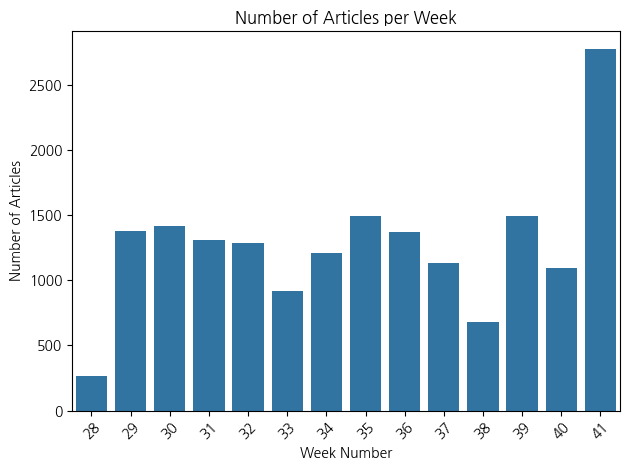

In [ ]:
# prompt: 주별 기사건수 막대그래프 시각화

import seaborn as sns
# Group by week and count articles
df['week'] = df['일자'].dt.isocalendar().week
weekly_counts = df.groupby('week')['제목'].count()

# Create the bar plot
sns.barplot(x=weekly_counts.index, y=weekly_counts.values)
plt.xlabel('Week Number')
plt.ylabel('Number of Articles')
plt.title('Number of Articles per Week')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
df['일자'].dt.dayofweek.value_counts().sort_index()

,count
일자,
0,2973
1,2906
2,2913
3,3422
4,3588
5,675
6,1330


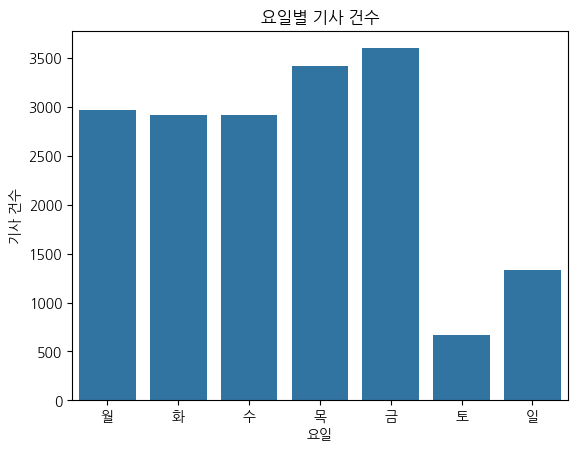

In [ ]:
# prompt: 요일별 기사건수 막대그래프 시각화

# 요일별 기사 건수 막대 그래프 시각화
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

# 요일별 기사 건수 계산
dayofweek_counts = df['일자'].dt.dayofweek.value_counts().sort_index()

# 요일 이름 매핑
days = ['월', '화', '수', '목', '금', '토', '일']
dayofweek_counts.index = [days[i] for i in dayofweek_counts.index]


# 막대 그래프 생성
sns.barplot(x=dayofweek_counts.index, y=dayofweek_counts.values)
plt.xlabel('요일')
plt.ylabel('기사 건수')
plt.title('요일별 기사 건수')
plt.show()

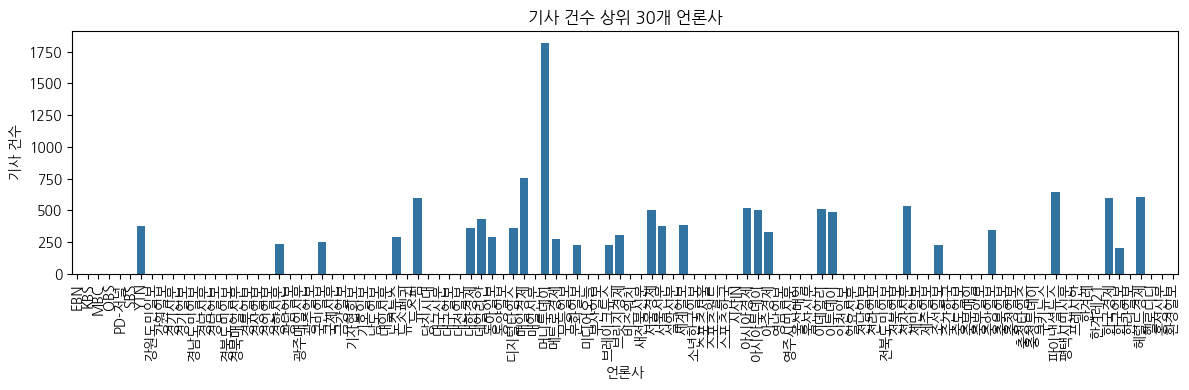

In [ ]:
# prompt: 기사건수가 많은 상위 30개 언론사별 현황을 내림차순으로 시각화
# Assuming 'df' is your DataFrame and it has a column named '언론사'
top_press = df['언론사'].value_counts().head(30)

plt.figure(figsize=(12, 4))
sns.barplot(x=top_press.index, y=top_press.values)
plt.xlabel('언론사')
plt.ylabel('기사 건수')
plt.title('기사 건수 상위 30개 언론사')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [ ]:
top_press.index#, y=top_press.values

CategoricalIndex(['머니투데이', '매일경제', '파이낸셜뉴스', '헤럴드경제', '뉴스핌', '한국경제', '전자신문',
                  '아시아경제', '이데일리', '서울경제', '아시아투데이', '이투데이', '데일리안', '세계일보',
                  '서울신문', 'YTN', '디지털타임스', '대한경제', '중앙일보', '아주경제', '브릿지경제',
                  '동아일보', '노컷뉴스', '메트로경제', '국민일보', '경향신문', '조선일보', '브레이크뉴스',
                  '문화일보', '한국일보'],
                 categories=['EBN', 'KBS', 'MBC', 'OBS', ..., '헤럴드경제', '헬로디디', '홍성신문', '환경일보'], ordered=False, dtype='category', name='언론사')

In [ ]:
df['기고자'].value_counts(dropna=False).reset_index()[1:][:10]

,기고자,count
1,최태범|기자,464
2,남미래|기자,235
3,김태현|기자,202
4,고석용|기자,129
5,YTN,73
6,김성휘|기자,72
7,박동제 기자,66
8,온라인뉴스팀,50
9,박기영|기자,49
10,권준영,48


In [ ]:
df[df['기고자'] == '남미래']

,일자,언론사,기고자,제목,인물,위치,기관,본문,분류1,분류2


In [ ]:
df.head()

,일자,언론사,기고자,제목,인물,위치,기관,본문,분류1,분류2
0,2024-08-28,이데일리,김정유,"홈플러스, ‘AI 가격혁명’ 강화 품목 2배 확대",김상진,"하인즈,LA,유명산,대구,비엔나,유명","홈플러스,CJ,신선식품,1.4kg,15Brix,10kg,샤인,1kg",[이데일리 김정유 기자] 홈플러스는 29일부터 다음달 11일까지 ‘2배 더 강력해진...,경제,서비스_쇼핑
1,2024-10-11,국민일보,김동환,‘흑백요리사’가 왜 여기서 나와? 한강 노벨상 인터뷰 포착,"임,임태훈,임 셰프","종로구,한강,서울,서촌,누상동","노벨상,노벨위원회,유튜브,국민일보,넷플릭스,JTBC",넷플릭스 예능 ‘흑백요리사’에서 일명 ‘철가방 요리사’로 인기를 얻은 임태훈(39)...,문화,방송_연예
2,2024-09-03,한국경제,심은지,'한강변 최고 77층' 아파트촌 탈바꿈 성수4지구 '들썩',정영보,"성수4구역,한강,서울,성수4지구,성수전략정비구역,성수전략정비구,서울시,성동구,성수","집행,시공사,성수1·2·4지구,성동구청,성수4지구,성수전략정비구역",한강 변 초고층 주거지로 변모하는 서울 성동구 성수전략정비구역이 연말 도시정비사업 ...,지역,경남
3,2024-10-10,경향신문,None,[사설] 한강의 노벨문학상 수상 한국 문학의 기념비적 쾌거,"김대중,한승원","우크라이나,스웨덴,한강,광주항쟁,영광,한국,트라,광주,용산","노벨상,한강,현대,한림원,혁신가,한국,희생자",소설가 한강이 한국 작가 최초로 노벨문학상을 수상했다. 스웨덴 한림원은 10일 올해...,문화,출판
4,2024-08-22,강원도민일보,남궁창성,[명경대] 1945년 건국(建國) 운동,"황운,여운형,진영,엔도오","경운동,몽양,서울,상록수,일제,건국동","조동우,조선총독부,동원,삼광의원,삼각산,몽양,일본,건국준비위원회,아침,통일,건국동맹",1944년 8월10일 서울 경운동 삼광의원. 머리가 희끗희끗한 몽양 여운형(1886...,정치,북한


In [ ]:
# prompt: 분류1, 2별로 기사건수

# Group by '분류1' and count articles
classification1_counts = df.groupby(['분류1', '분류2'])['제목'].count()
classification1_counts
import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap
# sns.heatmap(classification1_counts)

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 44284 (\N{HANGUL SYLLABLE GWA}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 54617 (\N{HANGUL SYLLABLE HAG}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 48152 (\N{HANGUL SYLLABLE BAN}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 44221 (\N{HANGUL SYLLABLE GYEONG}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 45224 (\N{HANGUL SYLLABLE NAM}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seab

<Axes: xlabel='분류2', ylabel='분류1'>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44284 (\N{HANGUL SYLLABLE GWA}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 54617 (\N{HANGUL SYLLABLE HAG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 48152 (\N{HANGUL SYLLABLE BAN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44221 (\N{HANGUL SYLLABLE GYEONG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 45224 (\N{HANGUL SYLLABLE NAM}) missing from current font.
  func(*

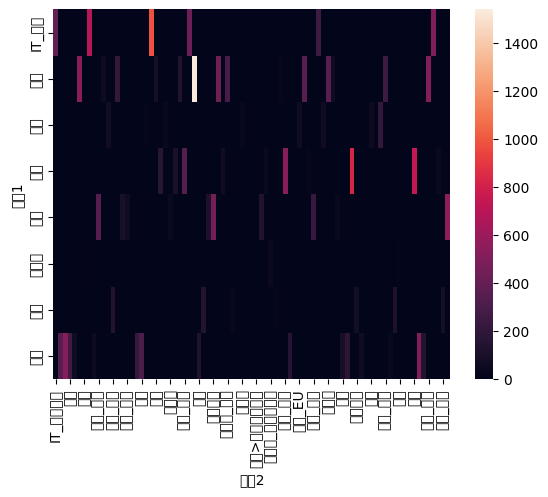

In [ ]:
sns.heatmap(classification1_counts.unstack().fillna(0).astype(int))

<Axes: xlabel='분류2', ylabel='분류1'>

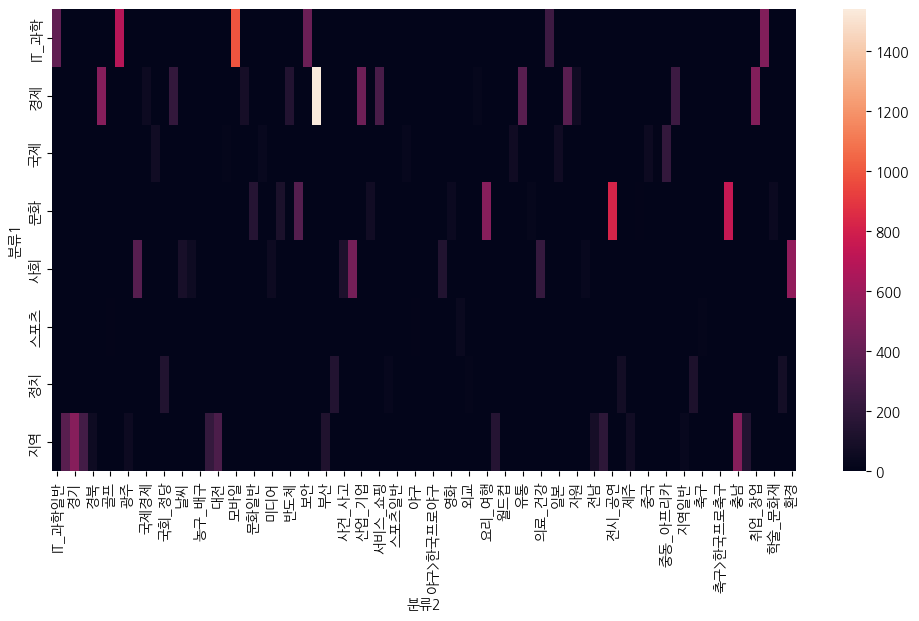

In [ ]:
plt.figure(figsize=(12, 6))
sns.heatmap(classification1_counts.unstack().fillna(0).astype(int))

- 본문 분석 (월별, 요일별 출현단어 빈도 분석)

In [ ]:
df['일자'].dt.weekday

,일자
0,2
1,4
2,1
3,3
4,3
...,...
36960,1
36981,2
37000,2
37012,3


In [ ]:
# prompt: 월별, 요일별 컬럼만들기

# 월별 컬럼 추가
df['월'] = df['일자'].dt.month

# 요일별 컬럼 추가 (숫자로 표현, 0:월요일, 6:일요일)
df['요일'] = df['일자'].dt.dayofweek


In [ ]:
df.head(2)

,일자,언론사,기고자,제목,인물,위치,기관,본문,분류1,분류2,월,요일
0,2024-08-28,이데일리,김정유,"홈플러스, ‘AI 가격혁명’ 강화 품목 2배 확대",김상진,"하인즈,LA,유명산,대구,비엔나,유명","홈플러스,CJ,신선식품,1.4kg,15Brix,10kg,샤인,1kg",[이데일리 김정유 기자] 홈플러스는 29일부터 다음달 11일까지 ‘2배 더 강력해진...,경제,서비스_쇼핑,8,2
1,2024-10-11,국민일보,김동환,‘흑백요리사’가 왜 여기서 나와? 한강 노벨상 인터뷰 포착,"임,임태훈,임 셰프","종로구,한강,서울,서촌,누상동","노벨상,노벨위원회,유튜브,국민일보,넷플릭스,JTBC",넷플릭스 예능 ‘흑백요리사’에서 일명 ‘철가방 요리사’로 인기를 얻은 임태훈(39)...,문화,방송_연예,10,4


In [ ]:
days = ['월', '화', '수', '목', '금', '토', '일']

days[2]

'수'

In [ ]:

# 요일을 한글로 표시 (옵션)
days = ['월', '화', '수', '목', '금', '토', '일']
df['요일(한글)'] = df['요일'].map(lambda x: days[x])

In [ ]:
df.head()

,일자,언론사,기고자,제목,인물,위치,기관,본문,분류1,분류2,월,요일,요일(한글)
0,2024-08-28,이데일리,김정유,"홈플러스, ‘AI 가격혁명’ 강화 품목 2배 확대",김상진,"하인즈,LA,유명산,대구,비엔나,유명","홈플러스,CJ,신선식품,1.4kg,15Brix,10kg,샤인,1kg",[이데일리 김정유 기자] 홈플러스는 29일부터 다음달 11일까지 ‘2배 더 강력해진...,경제,서비스_쇼핑,8,2,수
1,2024-10-11,국민일보,김동환,‘흑백요리사’가 왜 여기서 나와? 한강 노벨상 인터뷰 포착,"임,임태훈,임 셰프","종로구,한강,서울,서촌,누상동","노벨상,노벨위원회,유튜브,국민일보,넷플릭스,JTBC",넷플릭스 예능 ‘흑백요리사’에서 일명 ‘철가방 요리사’로 인기를 얻은 임태훈(39)...,문화,방송_연예,10,4,금
2,2024-09-03,한국경제,심은지,'한강변 최고 77층' 아파트촌 탈바꿈 성수4지구 '들썩',정영보,"성수4구역,한강,서울,성수4지구,성수전략정비구역,성수전략정비구,서울시,성동구,성수","집행,시공사,성수1·2·4지구,성동구청,성수4지구,성수전략정비구역",한강 변 초고층 주거지로 변모하는 서울 성동구 성수전략정비구역이 연말 도시정비사업 ...,지역,경남,9,1,화
3,2024-10-10,경향신문,None,[사설] 한강의 노벨문학상 수상 한국 문학의 기념비적 쾌거,"김대중,한승원","우크라이나,스웨덴,한강,광주항쟁,영광,한국,트라,광주,용산","노벨상,한강,현대,한림원,혁신가,한국,희생자",소설가 한강이 한국 작가 최초로 노벨문학상을 수상했다. 스웨덴 한림원은 10일 올해...,문화,출판,10,3,목
4,2024-08-22,강원도민일보,남궁창성,[명경대] 1945년 건국(建國) 운동,"황운,여운형,진영,엔도오","경운동,몽양,서울,상록수,일제,건국동","조동우,조선총독부,동원,삼광의원,삼각산,몽양,일본,건국준비위원회,아침,통일,건국동맹",1944년 8월10일 서울 경운동 삼광의원. 머리가 희끗희끗한 몽양 여운형(1886...,정치,북한,8,3,목


In [ ]:
df['위치'].to_list()[:2]

['하인즈,LA,유명산,대구,비엔나,유명', '종로구,한강,서울,서촌,누상동']

In [ ]:
' '.join(df['위치'].astype(str).dropna())

'하인즈,LA,유명산,대구,비엔나,유명 종로구,한강,서울,서촌,누상동 성수4구역,한강,서울,성수4지구,성수전략정비구역,성수전략정비구,서울시,성동구,성수 우크라이나,스웨덴,한강,광주항쟁,영광,한국,트라,광주,용산 경운동,몽양,서울,상록수,일제,건국동 경기도 미래관,신산,한국,대한민국 서해,안성,주실,양재,남원주,오산,일평,중부,평시,남이,신갈JC None None 이스라엘,중동,재스퍼,독일,미국,이란,레바논,파산 경북도,백두대간,대구시,글로벌미래특구,신산,안동,수도권,안동시,대구광역시,낙동정맥,울릉도,글로벌미래특,첨단,포항,경북 통합,국가산업단지,항만,대구경북,대구경북통합신공항,경상북도,스마트농,진흥지역,대구,경제자유구역,울릉군 한강대교,마포대교,한강,망원,용강지구,수난구조대,용강지구대,뚝섬,트라 한강,상주,서울시 도,강원자치도,인천광역시,강원특별자치도,인천 중구,한강,서울,강남권,강남구,강남,도 강남3,노량진역,대치,동작구,울 강남,송파구,노들역,잠실진주아파트,서초,어 서,올림픽공원,대치동,반포동,9호선,잠실,강남3구,남산,청담 국가주석,미국,일본,중국,경기,황광명,신산,첨단,선진,中 대한민국,경기도,도청 한강대교,마포대교,독일,한강,원효대교,양화대교,양화,한강공원,피엠인터내셔널코리아 독창,제주,한강,한국 세종시,축평원 동대문디자인플라자,서울특별시,서울,서울시 속초모범운전자회,초헌관,백담계곡,설악산,설악교,대청봉,남설악,설악산국립공원,소공원,공룡능선,양양군,오색지구,오색분소,속초시,설악동,중청∼소청∼천불동계곡,외설악,소청,설악,오색 여의상류IC,한강,서울,팔당댐,올림픽대로,잠수교,서울시 심사단과 청중평가단,가산,경기,신산,순항,경기도 주실,대도,일본,서울성모,대한민국,청해,수도권 영양,재구 한국기술지주회사협회,전주,미국,일본,호르,한국대학기술이전협회,한국,연동,제주시,제주,한국마이크로의료로봇연구원,의료 정보보호법,한승현 중구,서울,월평 한국뇌성마비복지회,신사,한국버슨마스텔러 미국,우시시,영국,중국,보스턴 한강,la,행주대교,고양시,마곡대교 개성,1호선,노량진,

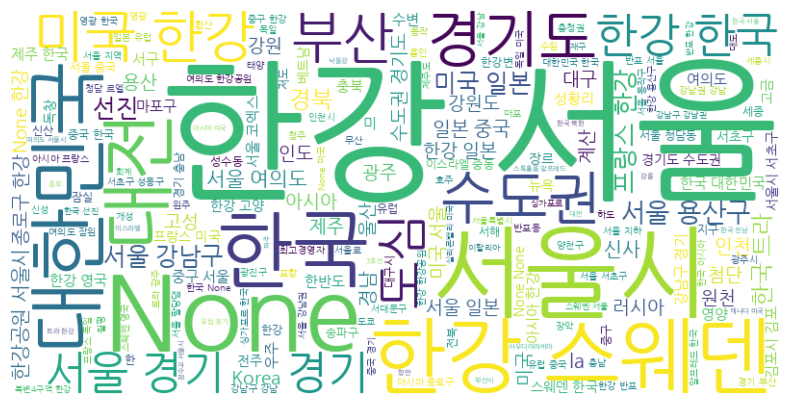

In [ ]:
# prompt: 위치 컬럼의 출현단어를 워드클라우드로

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and '위치' is the column you want to analyze
text = ' '.join(df['위치'].astype(str).dropna())  # Combine all non-missing values into a single string

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', font_path='/usr/share/fonts/truetype/nanum/NanumGothic.ttf').generate(text)

# Display the generated image:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
df.columns

Index(['일자', '언론사', '기고자', '제목', '인물', '위치', '기관', '본문', '분류1', '분류2', 'week',
       '월', '요일', '요일(한글)'],
      dtype='object')

In [ ]:
path

'/content/drive/MyDrive/2024_2학기/인공지능모델운영/24_가을_인공지능모델운영_textmining/data/Capstone_03_SentimentAnalysis.pkl'

In [ ]:
path = '/content/drive/MyDrive/2024_2학기/인공지능모델운영/24_가을_인공지능모델운영_textmining/data/data.pkl'

In [ ]:
df[['일자', '본문']].to_pickle(path)

In [ ]:
df = df[['일자', '본문']]

### **<font color='orange'> Phase 3. 본문에서 단어추출 후 분석단계**

In [ ]:
df = pd.read_pickle(path)
df.head()

,일자,본문
0,2024-08-05,[앵커]\n\n 아무리 더운 날씨도 시원한 물과 얼음이 있다면 거뜬히 이겨낼 수 있...
1,2024-09-17,"▲ 에스파(aespa / 카리나, 윈터, 지젤, 닝닝) <사진출처=SM엔터테인먼트>..."
2,2024-10-10,[KBS 청주]\n보은대추축제가 오는 내일부터 열흘 동안 보은 뱃들공원과 속리산 일...
3,2024-10-12,<앵커> \n \n 그동안 뛰어난 우리 문학 작품들은 번역의 어려움으로 세계 무대에...
4,2024-07-18,집중호우로 한강 수위가 계속 상승하면서 18일 오후 2시 15분께부터 서울 잠수교 ...


In [ ]:
for i in df[:3].iterrows():
    print(i)
    print(f'\n본문 내용: {i[1]}')
  #  break

(0, 일자                                  2024-08-28 00:00:00
본문    [이데일리 김정유 기자] 홈플러스는 29일부터 다음달 11일까지 ‘2배 더 강력해진...
Name: 0, dtype: object)

본문 내용: 일자                                  2024-08-28 00:00:00
본문    [이데일리 김정유 기자] 홈플러스는 29일부터 다음달 11일까지 ‘2배 더 강력해진...
Name: 0, dtype: object
(1, 일자                                  2024-10-11 00:00:00
본문    넷플릭스 예능 ‘흑백요리사’에서 일명 ‘철가방 요리사’로 인기를 얻은 임태훈(39)...
Name: 1, dtype: object)

본문 내용: 일자                                  2024-10-11 00:00:00
본문    넷플릭스 예능 ‘흑백요리사’에서 일명 ‘철가방 요리사’로 인기를 얻은 임태훈(39)...
Name: 1, dtype: object
(2, 일자                                  2024-09-03 00:00:00
본문    한강 변 초고층 주거지로 변모하는 서울 성동구 성수전략정비구역이 연말 도시정비사업 ...
Name: 2, dtype: object)

본문 내용: 일자                                  2024-09-03 00:00:00
본문    한강 변 초고층 주거지로 변모하는 서울 성동구 성수전략정비구역이 연말 도시정비사업 ...
Name: 2, dtype: object


In [ ]:
for i in df['본문'][:5]:
    print(i)
    print('*'*100)

[앵커]

 아무리 더운 날씨도 시원한 물과 얼음이 있다면 거뜬히 이겨낼 수 있겠죠.

 극한 폭염을 피해 강으로, 빙판으로 몰려든 시민들의 모습을 배지현 기자가 전해드립니다.

 [리포트] 

불볕 더위 속 겨울왕국이 펼쳐진 실내 스케이트장.

 꽁꽁 얼어붙은 빙판 위 피서 인파가 가득합니다.

 얼음 위 엉거주춤 불안한 발걸음에, 쿵 넘어져도 계절을..
****************************************************************************************************
▲ 에스파(aespa / 카리나, 윈터, 지젤, 닝닝) <사진출처=SM엔터테인먼트>     ©브레이크뉴스 
 










   
 


   
 


 브레이크뉴스 박동제 기자= 아이돌그룹 브랜드평판 2024년 9월 빅데이터 분석결과 1위 에스파, 2위 아이브, 3위 세븐틴 순으로 나타났다.​​ 
 


   
 


 한국기업평판연구소는 17일..
****************************************************************************************************
[KBS 청주]
보은대추축제가 오는 내일부터 열흘 동안 보은 뱃들공원과 속리산 일대에서 열립니다.

이번 행사에서는 생대추 1kg을 크기에 따라 12,000원에서 25,000원 선에 살 수 있습니다.

또, 트로트와 퓨전 국악, 뮤지컬 갈라쇼, 마술쇼 등 다양한 공연이 진행됩니다.

이밖에 '보은 민속 소 힘겨루기 대회'가 16일에서 20일까지 보청천 ..
****************************************************************************************************
<앵커> 
 
 그동안 뛰어난 우리 문학 작품들은 번역의 어려움으로 세계 무대에서 그 가치를 인정받지 못했습니다. 이번 쾌거 뒤에는 현지 독자들의 정서에 꾸준히 다가서기

In [ ]:
 df['본문'][:5]

,본문
0,[앵커]\n\n 아무리 더운 날씨도 시원한 물과 얼음이 있다면 거뜬히 이겨낼 수 있...
1,"▲ 에스파(aespa / 카리나, 윈터, 지젤, 닝닝) <사진출처=SM엔터테인먼트>..."
2,[KBS 청주]\n보은대추축제가 오는 내일부터 열흘 동안 보은 뱃들공원과 속리산 일...
3,<앵커> \n \n 그동안 뛰어난 우리 문학 작품들은 번역의 어려움으로 세계 무대에...
4,집중호우로 한강 수위가 계속 상승하면서 18일 오후 2시 15분께부터 서울 잠수교 ...


In [ ]:
! pip install konlpy --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 41.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.6/488.6 kB 22.5 MB/s eta 0:00:00


In [ ]:
# prompt: 특수문자를 제거하고, 길이가 1인 단어도 제거, 아라비아수자로 시작되는 단어 제거한 후 단어 추출을 해줘 konlpy 모듈로

from konlpy.tag import Okt
import re

okt = Okt()

def preprocess_text(text):
  # 특수문자 제거
  text = re.sub(r"[^ㄱ-ㅎㅏ-ㅣ가-힣a-zA-Z0-9 ]", "", text)
  # 길이가 1인 단어 제거 및 숫자로 시작하는 단어 제거
  words = [word for word in okt.nouns(text) if len(word) > 1 and not word[0].isdigit()]
  return words

# 예시 사용
for text in df['본문'][:5]:
  processed_words = preprocess_text(str(text))
  print(processed_words)
  print('*' * 100)

['이데일리', '김정유', '기자', '홈플러스', '다음', '인공', '지능', '가격', '혁명', '행사', '진행', '사진', '홈플러스', '가격', '혁명', '홈플러스', '축적', '빅데이터', '바탕', '기별', '수요', '핵심', '상품', '통해', '선정', '업계', '최저', '행사', '이번', '행사', '가격', '혁명', '행사', '품목']
****************************************************************************************************
['넷플릭스', '예능', '흑백', '요리사', '일명', '가방', '요리사', '인기', '임태훈', '셰프', '일반', '행인', '방송', '뉴스', '등장', '한강', '작가', '노벨문학상', '수상', '대해', '인터뷰', '장면', '눈길', '뉴스', '공식', '유튜브', '채널', '노벨', '위원회', '직접', '한글', '이름', '한강', '소감', '한강', '문학', '영감', '제목', '영상', '영상']
****************************************************************************************************
['한강', '초고', '주거지', '변모', '서울', '성동구', '전략', '정비', '구역', '연말', '도시', '정비', '사업', '수주', '격전', '지로', '전망', '일부', '구역', '주요', '건설', '협조', '요청', '공문', '시공사', '선정', '사전', '작업', '시작', '성수', '구역', '재개발조합', '주요', '건설', '홍보', '활동', '지침', '협조', '요청', '공문', '발송', '시공사', '선정', '사전', '준비', '작업', '시작']
****************************************

In [ ]:
from konlpy.tag import Okt
import re

# 형태소 분석기 초기화
okt = Okt()

# 각 기사에서 단어 추출 (길이가 1인 단어 및 숫자로 시작하는 단어 제외)
for idx, article in  enumerate(df['본문'][:5]):
    # 텍스트 정제 (특수 문자 제거)
    clean_article = re.sub(r'[^\w\s]', '', article)
    # 형태소 분석을 통해 명사 추출
    nouns = okt.nouns(clean_article)
    # 길이가 1인 단어 및 아라비아 숫자로 시작하는 단어 제거
    filtered_nouns = [noun for noun in nouns if len(noun) > 1 and not re.match(r'^\d', noun)]

    # 결과 출력
    print(f"{idx+1}번째 기사에서 명사 추출: {filtered_nouns}")

1번째 기사에서 명사 추출: ['앵커', '날씨', '얼음', '극한', '폭염', '피해', '빙판', '시민', '모습', '배지현', '기자', '리포트', '불볕', '더위', '겨울왕국', '실내', '스케이트장', '꽁꽁', '빙판', '인파', '얼음', '엉거주춤', '발걸음', '계절']
2번째 기사에서 명사 추출: ['에스', '카리나', '윈터', '지젤', '닝닝', '사진', '출처', '엔터테인먼트', '브레이크뉴스', '브레이크뉴스', '박동', '기자', '아이돌', '그룹', '브랜드', '평판', '빅데이터', '분석', '결과', '에스', '아이브', '세븐', '한국', '기업', '평판', '연구소']
3번째 기사에서 명사 추출: ['청주', '보은', '대추', '축제', '내일', '열흘', '동안', '보은', '공원', '속리산', '일대', '이번', '행사', '대추', '크기', '트로트', '퓨전', '국악', '뮤지컬', '갈라', '마술', '공연', '진행', '보은', '민속', '힘겨루기', '대회', '보청']
4번째 기사에서 명사 추출: ['앵커', '그동안', '우리', '문학', '작품', '번역', '어려움', '세계', '무대', '가치', '이번', '쾌거', '현지', '독자', '정서', '번역가', '노력', '평가', '심우섭', '기자', '기자', '지난', '인터내셔널', '한강', '가장', '먼저']
5번째 기사에서 명사 추출: ['집중호우', '한강', '수위', '계속', '상승', '오후', '서울', '잠수교', '차량', '통행', '전면', '통제', '경찰', '관계자', '오후', '잠수교', '수위', '선제', '조치', '차량', '통행', '통제', '중이', '연일', '이어진', '집중호우', '한강', '수위', '상승', '서울', '서초구', '잠수교', '보행', '통제', '잠수교', '수위']


In [ ]:
# prompt: df의 본문컬럼에서 단어를 추출하여 list 형태의 corpus 만들기, tqdm이용

from tqdm import tqdm

# Assuming 'df' and 'okt' are already defined as in your provided code

def extract_words_from_corpus(df):
    corpus = []
    for idx, article in tqdm(df['본문'].items(), total=len(df['본문']), desc='Extracting words'):
        # 텍스트 정제 (특수 문자 제거)
        clean_article = re.sub(r'[^\w\s]', '', str(article)) # Handle potential NaN values

        # 형태소 분석을 통해 명사 추출
        nouns = okt.nouns(clean_article)
        # 길이가 1인 단어 및 아라비아 숫자로 시작하는 단어 제거
        filtered_nouns = [noun for noun in nouns if len(noun) > 1 and not re.match(r'^\d', noun)]
        corpus.extend(filtered_nouns)
    return corpus

# Example usage:
corpus = extract_words_from_corpus(df.sample(frac=0.1))
print(f"Corpus created successfully with {len(corpus)} words")

Extracting words: 100%|██████████| 5342/5342 [01:42<00:00, 52.07it/s]

Corpus created successfully with 188509 words


In [ ]:
corpus[:10]

['단군', '최대', '재건축', '올림픽', '파크', '레온', '주가', '가량', '소위', '주장']

In [ ]:
path

'/content/drive/MyDrive/2024_2학기/인공지능모델운영/24_가을_인공지능모델운영_textmining/data/data.pkl'

In [ ]:
path[:106]

'/content/drive/MyDrive/2024_2학기/인공지능모델운영/24_가을_인공지능모델운영_textmining/data/'

In [ ]:
# prompt: corpus를 txt로 저장하고 다시 읽기

# Save the corpus to a text file
corpus_file_path = '/content/drive/MyDrive/2024_2학기/인공지능모델운영/24_가을_인공지능모델운영_textmining/data/corpus.txt'  # Define the file path

with open(corpus_file_path, 'w', encoding='utf-8') as f:
    for word in corpus:
        f.write(word + '\n')

print(f"Corpus saved to {corpus_file_path}")


# Read the corpus from the text file
loaded_corpus = []
with open(corpus_file_path, 'r', encoding='utf-8') as f:
    for line in f:
        loaded_corpus.append(line.strip())  # Remove leading/trailing whitespace

print(f"Corpus loaded successfully with {len(loaded_corpus)} words")
print(f"First 10 words of the loaded corpus: {loaded_corpus[:10]}")

Corpus saved to /content/drive/MyDrive/2024_2학기/인공지능모델운영/24_가을_인공지능모델운영_textmining/data/corpus.txt
Corpus loaded successfully with 188509 words
First 10 words of the loaded corpus: ['단군', '최대', '재건축', '올림픽', '파크', '레온', '주가', '가량', '소위', '주장']


- 워드클라우드 시각화

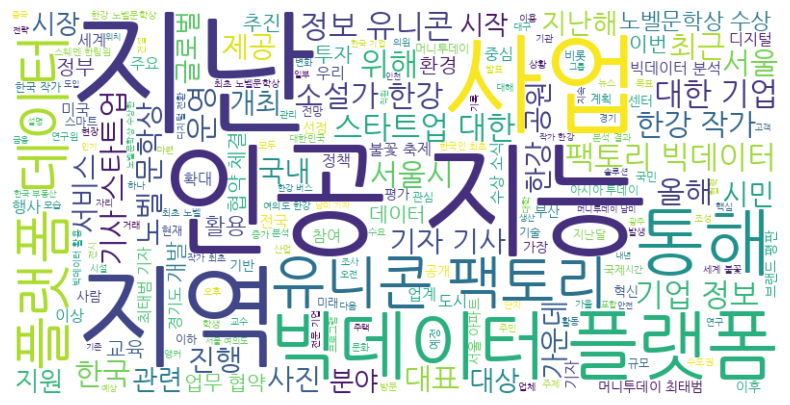

In [ ]:
# prompt: corpus를 워트클라우드로

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Load the corpus (assuming 'loaded_corpus' is defined as in your previous code)

# Combine words into a single string
text = " ".join(loaded_corpus)

# Create the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', font_path='/usr/share/fonts/truetype/nanum/NanumGothic.ttf').generate(text)

# Display the generated image:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
# prompt: "지난", "이하" 등의 단어는 stopword로

from konlpy.tag import Okt
import re

# ... (Your existing code)

stopwords = ['지난', '이하']  # Add more stopwords as needed

def extract_words_from_corpus(df):
    corpus = []
    for idx, article in tqdm(df['본문'].items(), total=len(df['본문']), desc='Extracting words'):
        # 텍스트 정제 (특수 문자 제거)
        clean_article = re.sub(r'[^\w\s]', '', str(article))

        # 형태소 분석을 통해 명사 추출
        nouns = okt.nouns(clean_article)

        # 길이가 1인 단어, 아라비아 숫자로 시작하는 단어, 불용어 제거
        filtered_nouns = [noun for noun in nouns if len(noun) > 1 and not re.match(r'^\d', noun) and noun not in stopwords]
        corpus.extend(filtered_nouns)
    return corpus
# Example usage (no changes here):
corpus = extract_words_from_corpus(df.sample(frac=0.1))
print(f"Corpus created successfully with {len(corpus)} words")
corpus[:10]
# ... (Rest of your code)


- tf-idf 매트릭스 생성

In [ ]:
# prompt: df['본문']을 일자별 기사로 countvector를 만들어다오

from sklearn.feature_extraction.text import CountVectorizer

# Assuming df['본문'] is your text data
vectorizer = CountVectorizer()

# Create the document-term matrix
dtm = vectorizer.fit_transform(df['본문'])

# Convert to DataFrame for better visualization
dtm_df = pd.DataFrame(dtm.toarray(), columns=vectorizer.get_feature_names_out())

# Print or further process the DataFrame
print(dtm_df.head())

   00  000  000120  000240  000490  000880  000가구  000개  000개를  000님의  ...  \
0   0    0       0       0       0       0      0     0      0      0  ...   
1   0    0       0       0       0       0      0     0      0      0  ...   
2   0    0       0       0       0       0      0     0      0      0  ...   
3   0    0       0       0       0       0      0     0      0      0  ...   
4   0    0       0       0       0       0      0     0      0      0  ...   

   힙합  洛東江  露地  籠橋  兩水里  龍華山  劉宏  李民  臨場  立秋  
0   0    0   0   0    0    0   0   0   0   0  
1   0    0   0   0    0    0   0   0   0   0  
2   0    0   0   0    0    0   0   0   0   0  
3   0    0   0   0    0    0   0   0   0   0  
4   0    0   0   0    0    0   0   0   0   0  

[5 rows x 120656 columns]
